In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/katrinarnadottir/Documents/Homeworks/session5-6/meteo (1).csv')

In [ ]:
print(df.info())

In [ ]:
print(df.head())

In [ ]:
print(df.describe())

In [19]:
clean_df = pd.DataFrame()

df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')  

clean_df['fecha'] = df['fecha']

df['tmed'] = df['tmed'].astype(str).str.strip().str.replace(",", ".", regex=False)
df['tmed'] = pd.to_numeric(df['tmed'], errors='coerce') 
clean_df['tmed'] = df['tmed']

print(clean_df.head())

       fecha  tmed
0 2024-06-29  17.0
1 2024-06-30  18.9
2 2024-07-01  21.4
3 2024-07-02  21.2
4 2024-07-03  24.0


In [23]:
def plot_temperature(date: pd.Series, temperatures: pd.Series):
    assert len(date) == len(temperatures)
    assert date.dtype == np.dtype("datetime64[ns]")
    assert temperatures.dtype == np.dtype("float64")

    years = date.dt.year
    day = date.dt.dayofyear

    plt.figure(figsize=(12, 6)) 
    plt.scatter(day, temperatures, c=years, cmap="viridis", marker=".")
    plt.colorbar(label="Year")
    plt.xticks(rotation=45)
    plt.xlabel("Day of Year")
    plt.ylabel("Temperature (°C)")
    plt.title("Average Daily Temperature Over Time")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


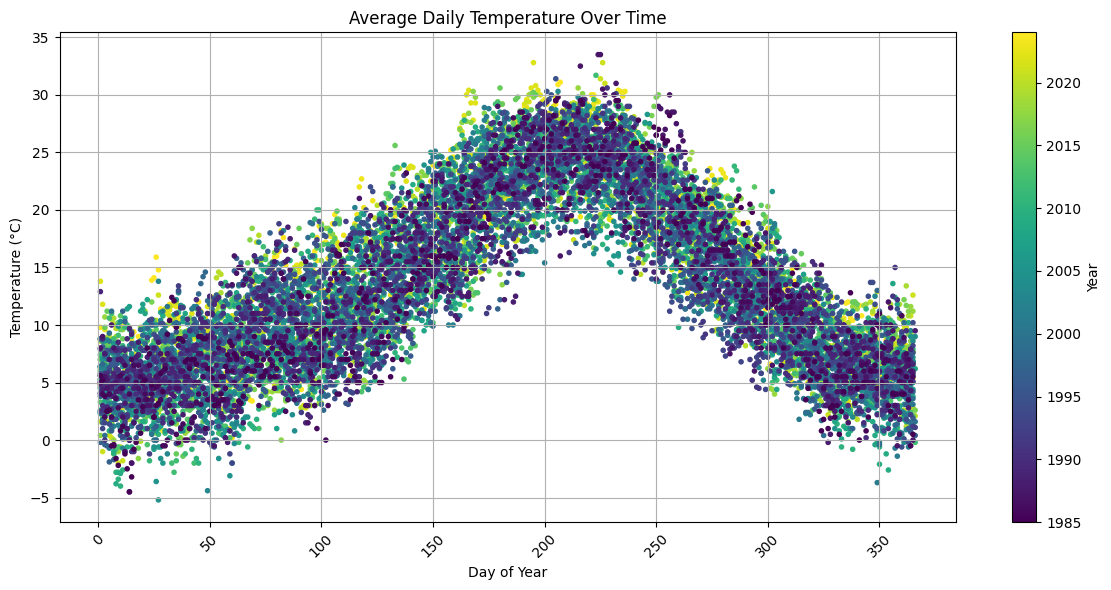

In [24]:
plot_temperature(clean_df['fecha'], clean_df['tmed'])

In [25]:
clean_df['year'] = clean_df['fecha'].dt.year

In [26]:
yearly_temp = clean_df.groupby('year')['tmed'].agg(['max', 'min']).reset_index()
print(yearly_temp)

    year   max  min
0   1982   NaN  NaN
1   1983   NaN  NaN
2   1984   NaN  NaN
3   1985  29.8 -4.5
4   1986  29.0 -0.5
5   1987  33.5 -4.5
6   1988  29.2 -0.2
7   1989  28.5  1.5
8   1990  29.4  0.2
9   1991  30.6 -1.0
10  1992  29.3 -1.2
11  1993  30.1 -2.0
12  1994  28.5 -0.6
13  1995  31.4  1.0
14  1996  28.0 -0.6
15  1997  28.0 -1.9
16  1998  28.9  0.0
17  1999  28.8 -0.4
18  2000  28.6 -0.7
19  2001  28.9 -3.7
20  2002  27.9  1.4
21  2003  29.8 -4.4
22  2004  30.3 -0.3
23  2005  29.2 -5.2
24  2006  28.6 -2.0
25  2007  28.0 -0.8
26  2008  28.6 -0.4
27  2009  28.0 -3.8
28  2010  28.2 -4.0
29  2011  29.1 -1.8
30  2012  31.7 -2.8
31  2013  28.2 -0.8
32  2014  27.8  0.0
33  2015  30.6 -1.4
34  2016  30.0  0.9
35  2017  30.3 -1.6
36  2018  30.6 -1.0
37  2019  30.0 -0.1
38  2020  29.2  1.2
39  2021  32.8 -2.0
40  2022  32.8  2.3
41  2023  30.4  0.0
42  2024  31.1  1.6


In [27]:
hottest_year = yearly_temp.loc[yearly_temp['max'].idxmax()]
coldest_year = yearly_temp.loc[yearly_temp['min'].idxmin()]

print(f"Hottest year: {hottest_year['year']} with max temp of {hottest_year['max']}°C")
print(f"Coldest year: {coldest_year['year']} with min temp of {coldest_year['min']}°C")

Hottest year: 1987.0 with max temp of 33.5°C
Coldest year: 2005.0 with min temp of -5.2°C


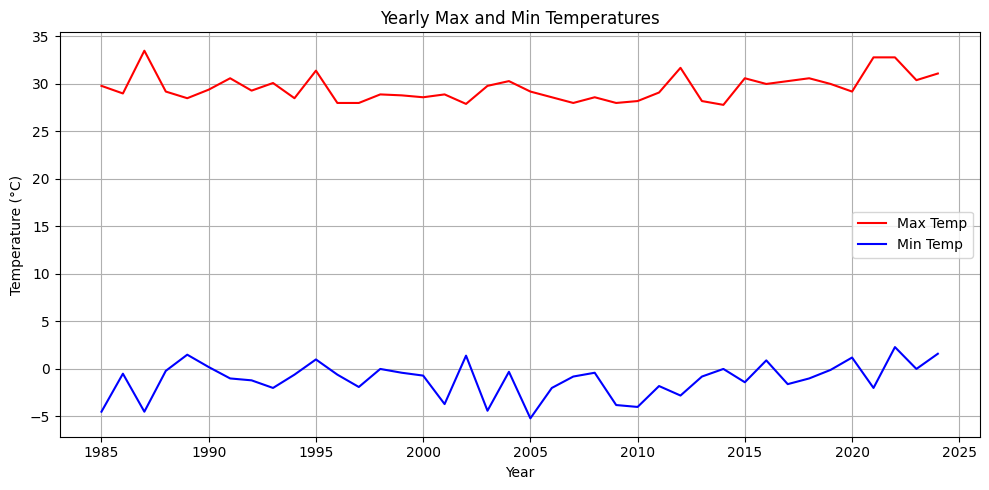

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_temp['year'], yearly_temp['max'], label="Max Temp", color="red")
plt.plot(yearly_temp['year'], yearly_temp['min'], label="Min Temp", color="blue")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Yearly Max and Min Temperatures")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
clean_df = clean_df.dropna(subset=['fecha', 'tmed'])
print(clean_df.head())

       fecha  tmed  year
0 2024-06-29  17.0  2024
1 2024-06-30  18.9  2024
2 2024-07-01  21.4  2024
3 2024-07-02  21.2  2024
4 2024-07-03  24.0  2024


In [32]:
clean_df.to_csv("clean_meteo.csv", index=False)

In [44]:
df = pd.read_csv("/Users/katrinarnadottir/Documents/Homeworks/session5-6/meteo (1).csv")
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

valid_times = df['horatmin'].str.match(r"^\d{2}:\d{2}$", na=False)
filtered_df = df[valid_times].copy()

combined = filtered_df['fecha'].astype(str) + " " + filtered_df['horatmin']
filtered_df['datetime_min_temp'] = pd.to_datetime(combined, errors='coerce')

print(filtered_df[['fecha', 'horatmin', 'datetime_min_temp']].head())

       fecha horatmin   datetime_min_temp
1 2024-06-30    05:45 2024-06-30 05:45:00
2 2024-07-01    03:50 2024-07-01 03:50:00
3 2024-07-02    05:15 2024-07-02 05:15:00
4 2024-07-03    05:15 2024-07-03 05:15:00
5 2024-07-04    05:30 2024-07-04 05:30:00


In [45]:
def plot_min_temp_time(datetime_series):
    # Extract day of year and hour from datetime
    day_of_year = datetime_series.dt.dayofyear
    hour = datetime_series.dt.hour + datetime_series.dt.minute / 60
    years = datetime_series.dt.year

    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(day_of_year, hour, c=years, cmap='plasma', s=10)
    plt.colorbar(label='Year')
    plt.xlabel('Day of Year')
    plt.ylabel('Hour of Day')
    plt.title('Time of Day for Minimum Temperature')
    plt.show()


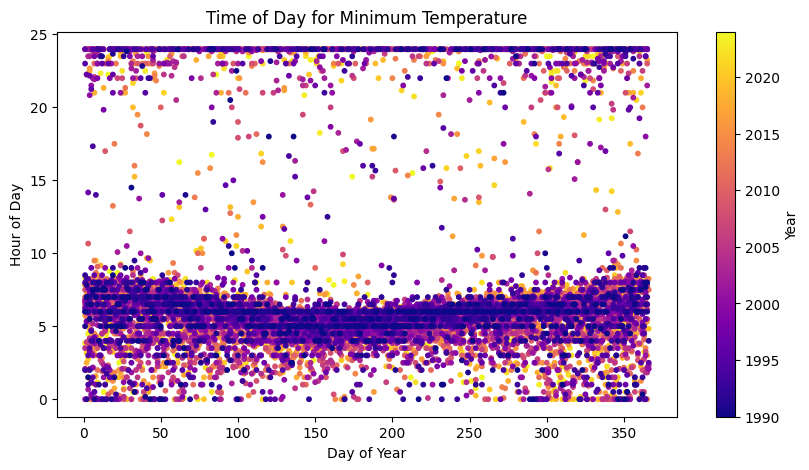

In [46]:
plot_min_temp_time(filtered_df['datetime_min_temp'])
